In [4]:
#!pip install pyreadr
#!wget -O 48_-_breast_cancer_data.RData "https://zenodo.org/records/7657781/files/48_-_breast_cancer_data.RData?download=1"

import pyreadr
import pandas as pd
import seaborn as sns

raw_data = pyreadr.read_r('48_-_breast_cancer_data.RData')['out']
raw_data.to_csv('dataset')

df = raw_data.copy()

# break-down of age vs targeta

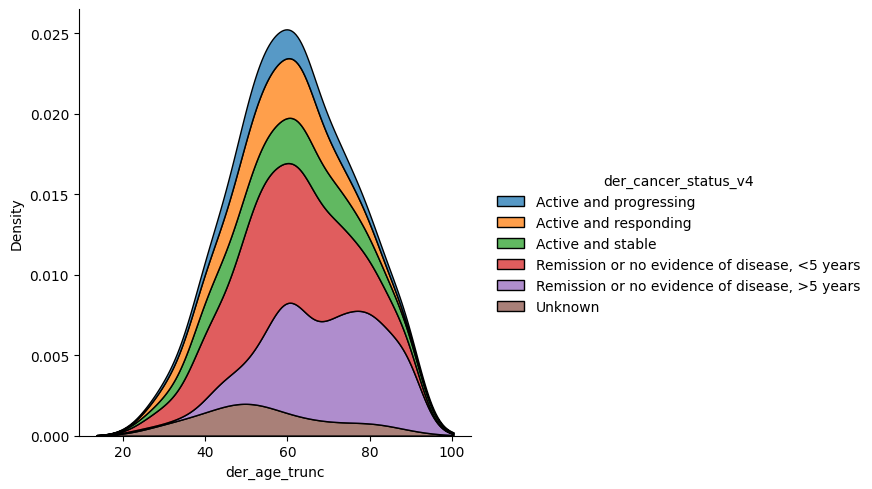

In [16]:
df_reg = df[['der_age_trunc', 'der_cancer_status_v4', 'severity_of_covid_19_v2']].dropna()
sns.displot(df_reg, x="der_age_trunc", kind="kde", hue = 'der_cancer_status_v4', multiple="stack")

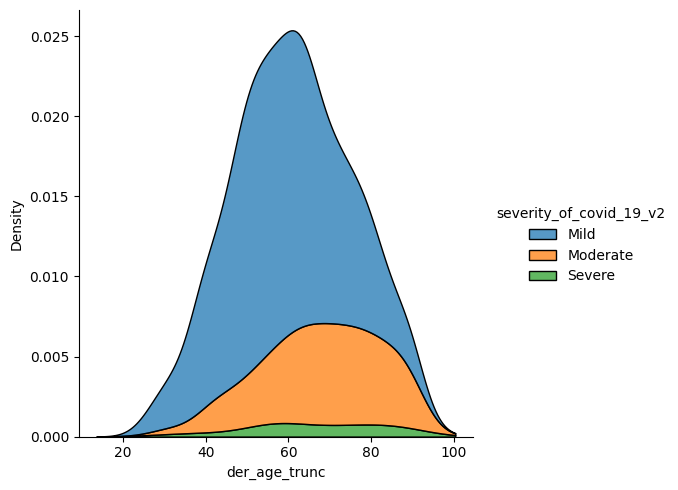

In [7]:
sns.displot(df_reg, x="der_age_trunc", kind="kde", hue = 'severity_of_covid_19_v2', multiple="stack")

In [8]:
df['der_cancer_status_v4'].unique()

['Active and responding', 'Active and stable', NaN, 'Unknown', 'Remission or no evidence of disease, <5 years', 'Active and progressing', 'Remission or no evidence of disease, >5 years']
Categories (6, object): ['Active and progressing', 'Active and responding', 'Active and stable',
                         'Remission or no evidence of disease, <5 years', 'Remission or no evidence of disease, >5 years',
                         'Unknown']

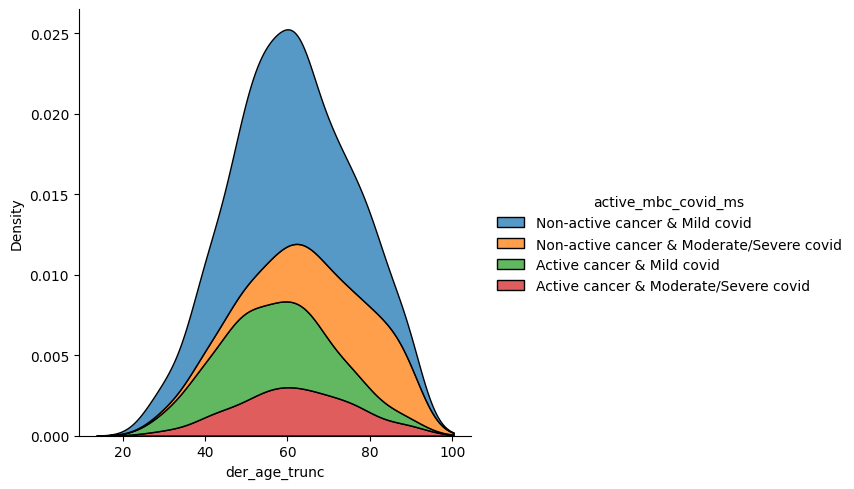

In [22]:
df_reg['active-cancer'] = df_reg['der_cancer_status_v4'].map(lambda x: 'Active' in x)
active_mbc_covid_ms = []
for a, c in df_reg[['active-cancer', 'severity_of_covid_19_v2']].values:
  x = 'Non-active cancer & '
  if a:
    x = 'Active cancer & '

  if c != 'Mild':
    x += 'Moderate/Severe covid'
  else:
    x += 'Mild covid'
  active_mbc_covid_ms.append(x)

df_reg['active_mbc_covid_ms'] = active_mbc_covid_ms
sns.displot(df_reg, x="der_age_trunc", kind="kde", hue = 'active_mbc_covid_ms', multiple="stack", hue_order=['Non-active cancer & Mild covid',
 'Non-active cancer & Moderate/Severe covid', 'Active cancer & Mild covid',
 'Active cancer & Moderate/Severe covid'])

# test for outliers in age

In [ ]:
quartiles = df['der_age_trunc'].quantile([0.25,0.5,0.75]).values
iqr = quartiles[-1] - quartiles[0]
quartiles, iqr

(array([51., 61., 72.]), 21.0)

In [ ]:
ages = df['der_age_trunc'].values
outliers = [x for x in ages if ((x < (quartiles[0] - (1.5*iqr))) | (x > (quartiles[2] + (1.5*iqr))))]
print(f'There are {len(outliers)} outliers based on age')

There are 0 outliers based on age


In [ ]:
sns.boxplot(data=df_reg, x="der_age_trunc", y="severity_of_covid_19_v2")

<Axes: xlabel='der_age_trunc', ylabel='der_cancer_status_v4'>

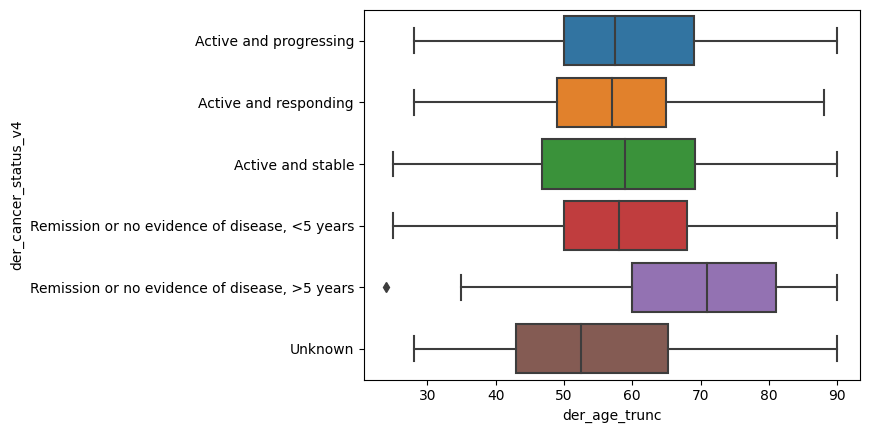

In [5]:
df_reg = df[['der_age_trunc', 'der_cancer_status_v4']].dropna()

sns.boxplot(data=df_reg, x="der_age_trunc", y="der_cancer_status_v4")

<Axes: xlabel='der_age_trunc', ylabel='severity_of_covid_19_v2'>

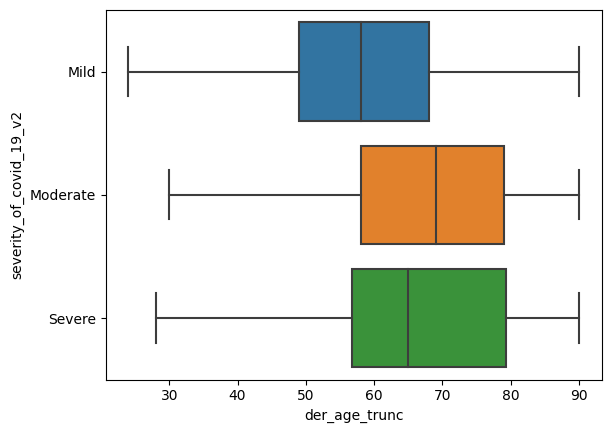

In [ ]:
df_reg = df[['der_age_trunc', 'severity_of_covid_19_v2']].dropna()

sns.boxplot(data=df_reg, x="der_age_trunc", y="severity_of_covid_19_v2")

In [ ]:
df_reg = df[['der_deadbinary', 'severity_of_covid_19_v2']].dropna()


# Creating a contingency table
contingency_table = pd.crosstab(df_reg['der_deadbinary'], df_reg['severity_of_covid_19_v2'])

contingency_table

severity_of_covid_19_v2,Mild,Moderate,Severe
der_deadbinary,,,
No,942,284,24
Yes,17,75,31
